In [ ]:
import folium

#seoul_map=folium.Map(location=[37.5658,126.975146],tiles='Stamen Terrain',zoom_start=16)
#seoul_map=folium.Map(location=[37.5658,126.975146],zoom_start=16)
seoul_map=folium.Map(location=[37.5658,126.975146],tiles='Stamen Toner',zoom_start=16)

seoul_map
#seoul_map.save('./seoul.html')

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import folium

#연수구청 

# 데이터프레임 변환
df = pd.read_csv('/content/인천광역시 연수구_주유소.csv',  encoding = 'CP949')

print(df)
#  지도 만들기
smap = folium.Map(location=[37.4101597 , 126.6783087 ], tiles='Stamen Terrain',      zoom_start=14)      #        연수구청 37.4101597  126.6783087      
                     

# 주유소 위치정보를 Marker로 표시
for name, lat, lng in zip(df.업소명, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(smap)

smap
# 지도를 HTML 파일로 저장하기
#seoul_map.save('./seoul_colleges.html')

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import folium

#연수구청 

# 데이터프레임 변환
df = pd.read_csv('/content/인천광역시 연수구_주유소.csv',  encoding = 'CP949')

print(df)
#  지도 만들기
smap = folium.Map(location=[37.4101597 , 126.6783087 ], tiles='Stamen Terrain',      zoom_start=14)      #        연수구청 37.4101597  126.6783087      
                     

for name, lat, lng in zip(df.업소명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=10,         # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7, # 투명도    
                        popup=name
    ).add_to(smap)


smap
# 지도를 HTML 파일로 저장하기
#seoul_map.save('./seoul_colleges.html')

In [49]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import folium
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
df = pd.read_csv('./경기도인구데이터.csv')  
#df.columns = df.columns.map(str)
print(df.index)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
g_geo = './경기도행정구역경계.json'


# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)


# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=g_geo,    # 지도 경계
                 data = df,      # 표시하려는 데이터
                 columns = ['구분','2007'],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 400000,500000, 700000],               
                 key_on='feature.properties.name',
                 ).add_to(g_map)

print(df.head())
g_map
# 지도를 HTML 파일로 저장하기
#g_map.save('./gyonggi_population_' + year + '.html')

RangeIndex(start=0, stop=44, step=1)
       구분    2007    2008    2009    2010    2011    2012    2013    2014  \
0  수원시장안구  287474  285803  290798  293692  290999  291757  300908  301196   
1  수원시권선구  310553  308177  304097  306783  321176  332633  331773  339835   
2  수원시팔달구  216945  213235  219833  216503  209772  206794  204805  203479   
3  수원시영통구  252730  260210  258421  260557  266542  289074  310671  329718   
4  성남시수정구  256744  248452  242161  241070  236123  233997  228167  223539   

     2015    2016    2017  
0  299016  296479  293828  
1  351053  358393  365653  
2  199180  198515  193311  
3  335375  340654  349836  
4  219531  232841  236932  


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 22.5 MB/s 
     |████████████████████████████████| 6.3 MB 56.1 MB/s 
     |████████████████████████████████| 16.7 MB 44.2 MB/s 


     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


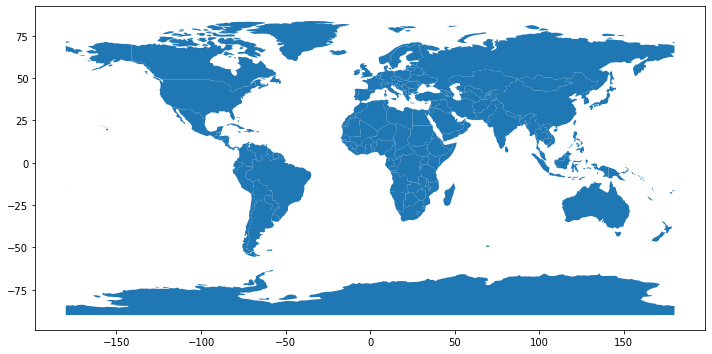

In [ ]:
import geopandas as gpd
pth=gpd.datasets.get_path('naturalearth_lowres')
world=gpd.GeoDataFrame.from_file(pth)
print(world.head())
world.plot(figsize=(10,10))

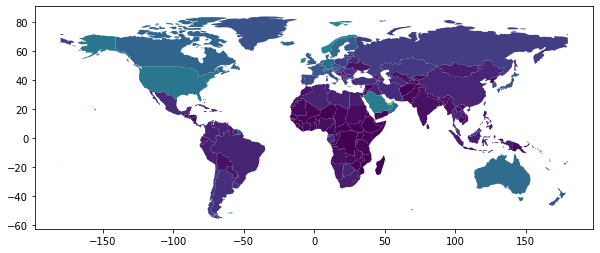

In [ ]:
 # Plot by GDP per capita
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap',figsize=(10,10));

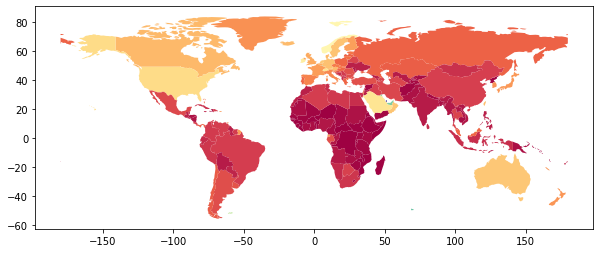

In [ ]:
 # Plot by GDP per capita
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap',cmap='Spectral',figsize=(10,10));

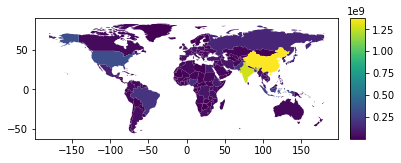

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

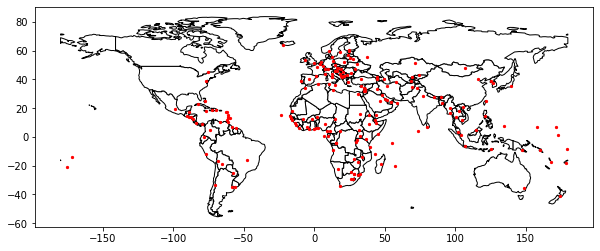

In [ ]:
import geopandas as gpd
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
base = world.plot(color='white', edgecolor='black',figsize=(10,10))

cities.plot(ax=base, marker='o', color='red', markersize=5)